In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!pip install requests

In [ ]:
import string 
import random 

In [ ]:
import requests
import json
import pandas as pd

In [ ]:
q = input()

apple


In [ ]:
url = 'https://newsapi.org/v2/everything?' + 'q=' + q +'&apiKey=44471cbfb6004833a44f0810acaca887&pageSize=100'

In [ ]:
everything_payload = {'q': q , 'language': 'en', 'sortBy': 'popularity'}

In [ ]:
response = requests.get(url=url, params=everything_payload)

In [ ]:
response = requests.get(url=url)

In [ ]:
pretty_json_output = json.dumps(response.json(), indent=4)
print(pretty_json_output)

{
    "status": "ok",
    "totalResults": 75166,
    "articles": [
        {
            "source": {
                "id": "engadget",
                "name": "Engadget"
            },
            "author": "Christine Fisher",
            "title": "Former Apple exec claims the company spied on his text messages",
            "description": "A former Apple executive is claiming the company spied on his text messages before suing him. In February, Gerard Williams III, who spent almost 10 years working on mobile device chips at Apple, left the company. The same month, he joined NuVia Inc -- a compa\u2026",
            "url": "https://www.engadget.com/2019/12/10/apple-lawsuit-snooped-text-messages/",
            "urlToImage": "https://o.aolcdn.com/images/dims?thumbnail=1200%2C630&quality=80&image_uri=https%3A%2F%2Fo.aolcdn.com%2Fimages%2Fdims%3Fcrop%3D5000%252C3129%252C0%252C203%26quality%3D85%26format%3Djpg%26resize%3D1600%252C1001%26image_uri%3Dhttps%253A%252F%252Fs.yimg.com%252Fos%252Fc

In [ ]:
response_json_string = json.dumps(response.json())

In [ ]:
response_dict = json.loads(response_json_string)

In [ ]:
articles_list = response_dict['articles']

In [ ]:
df = pd.read_json(json.dumps(articles_list))

In [ ]:
df

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'engadget', 'name': 'Engadget'}",Christine Fisher,Former Apple exec claims the company spied on ...,A former Apple executive is claiming the compa...,https://www.engadget.com/2019/12/10/apple-laws...,https://o.aolcdn.com/images/dims?thumbnail=120...,2019-12-10T16:49:00Z,"Apple says Williams violated his contract, whi..."
1,"{'id': None, 'name': 'Lifehacker.com'}",Brendan Hesse,Where to Find the Full List Apps and Games Inc...,Not long after Apple announced its subscriptio...,https://lifehacker.com/where-to-find-the-full-...,https://i.kinja-img.com/gawker-media/image/upl...,2019-12-06T20:04:00Z,Not long after Apple announced its subscriptio...
2,"{'id': 'the-verge', 'name': 'The Verge'}",Walt Mossberg,Mossberg: Tim Cook’s Apple had a great decade ...,Walt Mossberg is back to take a look at the la...,https://www.theverge.com/2019/12/17/21026112/a...,https://cdn.vox-cdn.com/thumbor/7OPK2u4s1zuK2w...,2019-12-17T17:48:35Z,How do you replace a legend like Steve Jobs an...
3,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Romain Dillet,Apple releases holiday ad,"Apple has released its annual holiday ad, just...",http://techcrunch.com/2019/11/25/apple-release...,https://techcrunch.com/wp-content/uploads/2019...,2019-11-25T19:35:36Z,"Apple has released its annual holiday ad, just..."
4,"{'id': 'the-verge', 'name': 'The Verge'}",Chaim Gartenberg,Apple Arcade adds new annual $49.99 subscripti...,"Apple is adding a new, $49.99 annual subscript...",https://www.theverge.com/2019/12/16/21024059/a...,https://cdn.vox-cdn.com/thumbor/ITfIO_GJwJW0Nu...,2019-12-16T14:05:32Z,In addition to the current $4.99-per-month pla...
...,...,...,...,...,...,...,...,...
95,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Sarah Perez,YouTube Music adds three new personalized play...,"YouTube Music is taking on Spotify, Apple Musi...",http://techcrunch.com/2019/12/17/youtube-music...,https://techcrunch.com/wp-content/uploads/2019...,2019-12-17T18:29:39Z,"YouTube Music is taking on Spotify, Apple Musi..."
96,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Greg Kumparak,"Ubiquity6’s Display.land is part 3D scanner, p...","The world is being mapped in 3D — one brick, o...",http://techcrunch.com/2019/11/18/ubiquity6s-di...,https://techcrunch.com/wp-content/uploads/2019...,2019-11-18T22:15:01Z,"The world is being mapped in 3D one brick, one..."
97,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Zack Whittaker,An iOS bug in AirDrop let anyone temporarily l...,"Apple has fixed a bug in iOS 13.3, out today, ...",http://techcrunch.com/2019/12/10/ios-airdrop-l...,https://techcrunch.com/wp-content/uploads/2019...,2019-12-10T18:31:22Z,"Apple has fixed a bug in iOS 13.3, out today, ..."
98,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Anthony Ha,Daily Crunch: Smart home giants partner on new...,The Daily Crunch is TechCrunch’s roundup of ou...,http://techcrunch.com/2019/12/18/daily-crunch-...,https://techcrunch.com/wp-content/uploads/2019...,2019-12-18T18:47:08Z,The Daily Crunch is TechCrunch’s roundup of ou...


In [ ]:
len(df.index)

100

**Sentimental** **Analysis**

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in df['description']:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

print(results)

[{'neg': 0.047, 'neu': 0.953, 'pos': 0.0, 'compound': -0.2732, 'headline': 'A former Apple executive is claiming the company spied on his text messages before suing him. In February, Gerard Williams III, who spent almost 10 years working on mobile device chips at Apple, left the company. The same month, he joined NuVia Inc -- a compa…'}, {'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'compound': 0.5859, 'headline': 'Not long after Apple announced its subscription-based gaming service, Apple Arcade, Google countered with its own similar subscription program: Google Play Pass. Unlike Apple Arcade,  Google Play Pass includes access to premium games and non-gaming apps avail…'}, {'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'compound': 0.6597, 'headline': 'Walt Mossberg is back to take a look at the last 10 years of Apple under Tim Cook. From the Apple Watch to AirPods to new services like Apple Music, Apple TV Plus, and more, it’s been defined by good products that haven’t risen to the iPhone’s leve

In [ ]:
df_new = pd.DataFrame(results)

In [ ]:
df_new

,neg,neu,pos,compound,headline
0,0.047,0.953,0.000,-0.2732,A former Apple executive is claiming the compa...
1,0.000,0.879,0.121,0.5859,Not long after Apple announced its subscriptio...
2,0.000,0.893,0.107,0.6597,Walt Mossberg is back to take a look at the la...
3,0.000,0.907,0.093,0.5423,"Apple has released its annual holiday ad, just..."
4,0.042,0.697,0.261,0.8020,"Apple is adding a new, $49.99 annual subscript..."
...,...,...,...,...,...
95,0.000,0.952,0.048,0.2732,"YouTube Music is taking on Spotify, Apple Musi..."
96,0.000,0.945,0.055,0.3612,"The world is being mapped in 3D — one brick, o..."
97,0.000,0.952,0.048,0.2960,"Apple has fixed a bug in iOS 13.3, out today, ..."
98,0.000,0.786,0.214,0.8479,The Daily Crunch is TechCrunch’s roundup of ou...


In [ ]:
df_new['label'] = 0
df_new.loc[df_new['compound'] > 0.2, 'label'] = 1
df_new.loc[df_new['compound'] < -0.2, 'label'] = -1
df_new.head()

,neg,neu,pos,compound,headline,label
0,0.047,0.953,0.000,-0.2732,A former Apple executive is claiming the compa...,-1
1,0.000,0.879,0.121,0.5859,Not long after Apple announced its subscriptio...,1
2,0.000,0.893,0.107,0.6597,Walt Mossberg is back to take a look at the la...,1
3,0.000,0.907,0.093,0.5423,"Apple has released its annual holiday ad, just...",1
4,0.042,0.697,0.261,0.8020,"Apple is adding a new, $49.99 annual subscript...",1


In [ ]:
df['label'] = df_new['label'].values
df['neg'] = df_new['neg'].values
df['neu'] = df_new['neu'].values
df['pos'] = df_new['pos'].values
df['compound'] = df_new['compound'].values

In [ ]:
df

,source,author,title,description,url,urlToImage,publishedAt,content,label,neg,neu,pos,compound
0,"{'id': 'engadget', 'name': 'Engadget'}",Christine Fisher,Former Apple exec claims the company spied on ...,A former Apple executive is claiming the compa...,https://www.engadget.com/2019/12/10/apple-laws...,https://o.aolcdn.com/images/dims?thumbnail=120...,2019-12-10T16:49:00Z,"Apple says Williams violated his contract, whi...",-1,0.047,0.953,0.000,-0.2732
1,"{'id': None, 'name': 'Lifehacker.com'}",Brendan Hesse,Where to Find the Full List Apps and Games Inc...,Not long after Apple announced its subscriptio...,https://lifehacker.com/where-to-find-the-full-...,https://i.kinja-img.com/gawker-media/image/upl...,2019-12-06T20:04:00Z,Not long after Apple announced its subscriptio...,1,0.000,0.879,0.121,0.5859
2,"{'id': 'the-verge', 'name': 'The Verge'}",Walt Mossberg,Mossberg: Tim Cook’s Apple had a great decade ...,Walt Mossberg is back to take a look at the la...,https://www.theverge.com/2019/12/17/21026112/a...,https://cdn.vox-cdn.com/thumbor/7OPK2u4s1zuK2w...,2019-12-17T17:48:35Z,How do you replace a legend like Steve Jobs an...,1,0.000,0.893,0.107,0.6597
3,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Romain Dillet,Apple releases holiday ad,"Apple has released its annual holiday ad, just...",http://techcrunch.com/2019/11/25/apple-release...,https://techcrunch.com/wp-content/uploads/2019...,2019-11-25T19:35:36Z,"Apple has released its annual holiday ad, just...",1,0.000,0.907,0.093,0.5423
4,"{'id': 'the-verge', 'name': 'The Verge'}",Chaim Gartenberg,Apple Arcade adds new annual $49.99 subscripti...,"Apple is adding a new, $49.99 annual subscript...",https://www.theverge.com/2019/12/16/21024059/a...,https://cdn.vox-cdn.com/thumbor/ITfIO_GJwJW0Nu...,2019-12-16T14:05:32Z,In addition to the current $4.99-per-month pla...,1,0.042,0.697,0.261,0.8020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Sarah Perez,YouTube Music adds three new personalized play...,"YouTube Music is taking on Spotify, Apple Musi...",http://techcrunch.com/2019/12/17/youtube-music...,https://techcrunch.com/wp-content/uploads/2019...,2019-12-17T18:29:39Z,"YouTube Music is taking on Spotify, Apple Musi...",1,0.000,0.952,0.048,0.2732
96,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Greg Kumparak,"Ubiquity6’s Display.land is part 3D scanner, p...","The world is being mapped in 3D — one brick, o...",http://techcrunch.com/2019/11/18/ubiquity6s-di...,https://techcrunch.com/wp-content/uploads/2019...,2019-11-18T22:15:01Z,"The world is being mapped in 3D one brick, one...",1,0.000,0.945,0.055,0.3612
97,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Zack Whittaker,An iOS bug in AirDrop let anyone temporarily l...,"Apple has fixed a bug in iOS 13.3, out today, ...",http://techcrunch.com/2019/12/10/ios-airdrop-l...,https://techcrunch.com/wp-content/uploads/2019...,2019-12-10T18:31:22Z,"Apple has fixed a bug in iOS 13.3, out today, ...",1,0.000,0.952,0.048,0.2960
98,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Anthony Ha,Daily Crunch: Smart home giants partner on new...,The Daily Crunch is TechCrunch’s roundup of ou...,http://techcrunch.com/2019/12/18/daily-crunch-...,https://techcrunch.com/wp-content/uploads/2019...,2019-12-18T18:47:08Z,The Daily Crunch is TechCrunch’s roundup of ou...,1,0.000,0.786,0.214,0.8479


In [ ]:
df_final = df.sort_values('compound')

In [ ]:
df_final.head(n=10)

,source,author,title,description,url,urlToImage,publishedAt,content,label,neg,neu,pos,compound
58,"{'id': 'engadget', 'name': 'Engadget'}",Richard Lawler,What's on TV this week: 'The Irishman',This week Netflix's biggest movie yet comes to...,https://www.engadget.com/2019/11/25/the-irishm...,https://o.aolcdn.com/images/dims?thumbnail=120...,2019-11-26T02:46:00Z,This week Netflix's biggest movie yet comes to...,-1,0.189,0.811,0.000,-0.8126
20,"{'id': 'engadget', 'name': 'Engadget'}",Jon Fingas,Apple loses bid to stop class action lawsuit o...,Apple will have to face a class action lawsuit...,https://www.engadget.com/2019/12/02/macbook-ke...,https://o.aolcdn.com/images/dims?thumbnail=120...,2019-12-03T01:11:00Z,The lawsuit covers many Apple laptops with but...,-1,0.192,0.777,0.031,-0.7548
32,"{'id': None, 'name': 'Lifehacker.com'}",David Murphy,What to Do When You're Locked Out of Your iPhone,What happens when someone else locks your iPho...,https://lifehacker.com/what-to-do-when-youre-l...,https://i.kinja-img.com/gawker-media/image/upl...,2019-12-13T14:00:00Z,What happens when someone else locks your iPho...,-1,0.133,0.867,0.000,-0.7184
38,"{'id': 'mashable', 'name': 'Mashable'}",Amanda Yeo,"Apple 'doesn't give a damn,' marks Crimea as p...","Apple's Maps and Weather apps, when accessed i...",https://mashable.com/article/apple-maps-crimea...,https://mondrian.mashable.com/2019%252F11%252F...,2019-11-28T03:12:34Z,"Apple's Maps and Weather apps, when accessed i...",-1,0.125,0.875,0.000,-0.6124
19,"{'id': None, 'name': 'Lifehacker.com'}","Lisa Rowan on Two Cents, shared by Lisa Rowan ...",Should You Buy an iPhone on Apple's New Instal...,"With price tags of $1,000—or more!—it’s hard t...",https://twocents.lifehacker.com/should-you-buy...,https://i.kinja-img.com/gawker-media/image/upl...,2019-12-10T16:30:00Z,"With price tags of $1,000or more!its hard to i...",-1,0.115,0.885,0.000,-0.5562
54,"{'id': None, 'name': 'Lifehacker.com'}",Josh Ocampo,How to Get Airlines to Accommodate Your Food A...,"In a story for the New York Times, one travele...",https://lifehacker.com/how-to-get-airlines-to-...,https://i.kinja-img.com/gawker-media/image/upl...,2019-12-12T18:15:00Z,"In a story for the New York Times, one travele...",-1,0.120,0.828,0.052,-0.4767
15,"{'id': 'engadget', 'name': 'Engadget'}",Christine Fisher,It looks like BMW will drop its Apple CarPlay ...,For years BMW has charged customers for access...,https://www.engadget.com/2019/12/04/bmw-apple-...,https://o.aolcdn.com/images/dims?thumbnail=120...,2019-12-04T19:09:00Z,"While Apple doesn't charge a fee for CarPlay, ...",-1,0.119,0.881,0.000,-0.4626
36,"{'id': None, 'name': 'Gizmodo.com'}",Victoria Song,Apple Is Apparently Working on AR Headphones,"At this point, it’s no secret that Apple’s wor...",https://gizmodo.com/apple-is-apparently-workin...,https://i.kinja-img.com/gawker-media/image/upl...,2019-11-27T16:00:00Z,"At this point, its no secret that Apples worki...",-1,0.071,0.929,0.000,-0.2960
0,"{'id': 'engadget', 'name': 'Engadget'}",Christine Fisher,Former Apple exec claims the company spied on ...,A former Apple executive is claiming the compa...,https://www.engadget.com/2019/12/10/apple-laws...,https://o.aolcdn.com/images/dims?thumbnail=120...,2019-12-10T16:49:00Z,"Apple says Williams violated his contract, whi...",-1,0.047,0.953,0.000,-0.2732
56,"{'id': None, 'name': 'Gizmodo.com'}",Andrew Couts,Apple News Is Hosting a 2020 Democratic Debate...,"Like some kind of maniac, Apple is plunging in...",https://gizmodo.com/apple-news-is-hosting-a-20...,https://i.kinja-img.com/gawker-media/image/upl...,2019-12-12T17:28:00Z,"Like some kind of maniac, Apple is plunging in...",-1,0.148,0.743,0.109,-0.2247


In [ ]:
df_neg = df_final[df_final.label == -1]

In [ ]:
df_neg.head(n=10)

,source,author,title,description,url,urlToImage,publishedAt,content,label,neg,neu,pos,compound
58,"{'id': 'engadget', 'name': 'Engadget'}",Richard Lawler,What's on TV this week: 'The Irishman',This week Netflix's biggest movie yet comes to...,https://www.engadget.com/2019/11/25/the-irishm...,https://o.aolcdn.com/images/dims?thumbnail=120...,2019-11-26T02:46:00Z,This week Netflix's biggest movie yet comes to...,-1,0.189,0.811,0.000,-0.8126
20,"{'id': 'engadget', 'name': 'Engadget'}",Jon Fingas,Apple loses bid to stop class action lawsuit o...,Apple will have to face a class action lawsuit...,https://www.engadget.com/2019/12/02/macbook-ke...,https://o.aolcdn.com/images/dims?thumbnail=120...,2019-12-03T01:11:00Z,The lawsuit covers many Apple laptops with but...,-1,0.192,0.777,0.031,-0.7548
32,"{'id': None, 'name': 'Lifehacker.com'}",David Murphy,What to Do When You're Locked Out of Your iPhone,What happens when someone else locks your iPho...,https://lifehacker.com/what-to-do-when-youre-l...,https://i.kinja-img.com/gawker-media/image/upl...,2019-12-13T14:00:00Z,What happens when someone else locks your iPho...,-1,0.133,0.867,0.000,-0.7184
38,"{'id': 'mashable', 'name': 'Mashable'}",Amanda Yeo,"Apple 'doesn't give a damn,' marks Crimea as p...","Apple's Maps and Weather apps, when accessed i...",https://mashable.com/article/apple-maps-crimea...,https://mondrian.mashable.com/2019%252F11%252F...,2019-11-28T03:12:34Z,"Apple's Maps and Weather apps, when accessed i...",-1,0.125,0.875,0.000,-0.6124
19,"{'id': None, 'name': 'Lifehacker.com'}","Lisa Rowan on Two Cents, shared by Lisa Rowan ...",Should You Buy an iPhone on Apple's New Instal...,"With price tags of $1,000—or more!—it’s hard t...",https://twocents.lifehacker.com/should-you-buy...,https://i.kinja-img.com/gawker-media/image/upl...,2019-12-10T16:30:00Z,"With price tags of $1,000or more!its hard to i...",-1,0.115,0.885,0.000,-0.5562
54,"{'id': None, 'name': 'Lifehacker.com'}",Josh Ocampo,How to Get Airlines to Accommodate Your Food A...,"In a story for the New York Times, one travele...",https://lifehacker.com/how-to-get-airlines-to-...,https://i.kinja-img.com/gawker-media/image/upl...,2019-12-12T18:15:00Z,"In a story for the New York Times, one travele...",-1,0.120,0.828,0.052,-0.4767
15,"{'id': 'engadget', 'name': 'Engadget'}",Christine Fisher,It looks like BMW will drop its Apple CarPlay ...,For years BMW has charged customers for access...,https://www.engadget.com/2019/12/04/bmw-apple-...,https://o.aolcdn.com/images/dims?thumbnail=120...,2019-12-04T19:09:00Z,"While Apple doesn't charge a fee for CarPlay, ...",-1,0.119,0.881,0.000,-0.4626
36,"{'id': None, 'name': 'Gizmodo.com'}",Victoria Song,Apple Is Apparently Working on AR Headphones,"At this point, it’s no secret that Apple’s wor...",https://gizmodo.com/apple-is-apparently-workin...,https://i.kinja-img.com/gawker-media/image/upl...,2019-11-27T16:00:00Z,"At this point, its no secret that Apples worki...",-1,0.071,0.929,0.000,-0.2960
0,"{'id': 'engadget', 'name': 'Engadget'}",Christine Fisher,Former Apple exec claims the company spied on ...,A former Apple executive is claiming the compa...,https://www.engadget.com/2019/12/10/apple-laws...,https://o.aolcdn.com/images/dims?thumbnail=120...,2019-12-10T16:49:00Z,"Apple says Williams violated his contract, whi...",-1,0.047,0.953,0.000,-0.2732
56,"{'id': None, 'name': 'Gizmodo.com'}",Andrew Couts,Apple News Is Hosting a 2020 Democratic Debate...,"Like some kind of maniac, Apple is plunging in...",https://gizmodo.com/apple-news-is-hosting-a-20...,https://i.kinja-img.com/gawker-media/image/upl...,2019-12-12T17:28:00Z,"Like some kind of maniac, Apple is plunging in...",-1,0.148,0.743,0.109,-0.2247


In [ ]:
df_pos = df_final[df_final.label == 1]

In [ ]:
df_pos.head(n=10)

,source,author,title,description,url,urlToImage,publishedAt,content,label,neg,neu,pos,compound
48,"{'id': 'the-verge', 'name': 'The Verge'}",Dani Deahl,Billboard is changing its albums chart to coun...,Billboard is going to allow YouTube streams to...,https://www.theverge.com/2019/12/13/21020836/b...,https://cdn.vox-cdn.com/thumbor/0Utja39kM_Gmcw...,2019-12-13T20:26:22Z,Illustration by William Joel / The Verge Billb...,1,0.000,0.944,0.056,0.2263
95,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Sarah Perez,YouTube Music adds three new personalized play...,"YouTube Music is taking on Spotify, Apple Musi...",http://techcrunch.com/2019/12/17/youtube-music...,https://techcrunch.com/wp-content/uploads/2019...,2019-12-17T18:29:39Z,"YouTube Music is taking on Spotify, Apple Musi...",1,0.000,0.952,0.048,0.2732
84,"{'id': 'mashable', 'name': 'Mashable'}",Nikolay Nikolov,Apple plans to remove the charging port on its...,"The plan would prioritize wireless charging, a...",https://mashable.com/video/iphone-loses-chargi...,https://mondrian.mashable.com/2019%252F12%252F...,2019-12-06T18:40:19Z,None,1,0.000,0.909,0.091,0.2732
51,"{'id': None, 'name': 'Gizmodo.com'}",Victoria Song,Apple Kills App That Made iPhones Look Like iP...,"All good things must come to an end. Still, th...",https://gizmodo.com/apple-kills-app-that-made-...,https://i.kinja-img.com/gawker-media/image/upl...,2019-12-17T17:00:00Z,"All good things must come to an end. Still, th...",1,0.082,0.780,0.138,0.2732
97,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Zack Whittaker,An iOS bug in AirDrop let anyone temporarily l...,"Apple has fixed a bug in iOS 13.3, out today, ...",http://techcrunch.com/2019/12/10/ios-airdrop-l...,https://techcrunch.com/wp-content/uploads/2019...,2019-12-10T18:31:22Z,"Apple has fixed a bug in iOS 13.3, out today, ...",1,0.000,0.952,0.048,0.2960
62,"{'id': 'mashable', 'name': 'Mashable'}",Joseph Green,Apple AirPods are still on sale on Amazon,TL;DR: Apple AirPods are on sale for £158.99 o...,https://mashable.com/uk/shopping/best-deal-app...,https://mondrian.mashable.com/2019%252F11%252F...,2019-11-27T14:05:49Z,TL;DR:Apple AirPods are on sale for £158.99 on...,1,0.000,0.922,0.078,0.3400
96,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Greg Kumparak,"Ubiquity6’s Display.land is part 3D scanner, p...","The world is being mapped in 3D — one brick, o...",http://techcrunch.com/2019/11/18/ubiquity6s-di...,https://techcrunch.com/wp-content/uploads/2019...,2019-11-18T22:15:01Z,"The world is being mapped in 3D one brick, one...",1,0.000,0.945,0.055,0.3612
52,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Darrell Etherington,Intel says Qualcomm’s business practices drove...,It’s not like this wasn’t among the reasons ev...,http://techcrunch.com/2019/11/29/intel-says-qu...,https://techcrunch.com/wp-content/uploads/2019...,2019-11-29T18:55:07Z,It’s not like this wasn’t among the reasons ev...,1,0.063,0.862,0.075,0.3705
21,"{'id': 'the-verge', 'name': 'The Verge'}",Russell Brandom,Why Tim Cook made friends with Donald Trump,Apple CEO Tim Cook and President Donald Trump ...,https://www.theverge.com/2019/11/20/20973991/t...,https://cdn.vox-cdn.com/thumbor/vKq5RcPhryPfZg...,2019-11-20T15:43:37Z,"Cooks strange, transactional relationship has ...",1,0.000,0.940,0.060,0.3818
16,"{'id': 'engadget', 'name': 'Engadget'}",Jon Fingas,Apple offers three-month News+ trials through ...,Apple Music has long had three-month free tria...,https://www.engadget.com/2019/11/30/apple-news...,https://o.aolcdn.com/images/dims?thumbnail=120...,2019-12-01T03:45:00Z,"As always, you'll want to keep an eye on when ...",1,0.000,0.926,0.074,0.3818


In [ ]:
group_by_label = df_final.groupby(by=['label'])
count = group_by_label.count()

In [ ]:
count_series = count.iloc[:,0]

In [ ]:
print(count_series)

label
-1    11
 0    24
 1    65
Name: source, dtype: int64


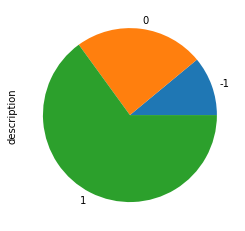

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df.groupby('label')['description'].nunique().plot(kind='pie')
plt.show()

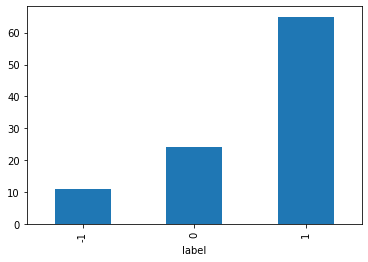

In [ ]:
df.groupby('label')['description'].nunique().plot(kind='bar')
plt.show()